In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import sympy as smp
import fourierdouble as fd


In [2]:
x,y,a,b,p,wm,v,d,E,f,h,c1,c2,c3,c4, alfa=smp.symbols('x y a b p wm v d E f h c1 c2 c3 c4 alfa')
m,n,i,j=smp.symbols('m n i j', int=True)

In [3]:
E=25000000
v=0.2
h=0.3
d=E*h**3/(12*(1-v**2))
a=10
b=10
alfa=n*x*smp.pi/a

In [4]:
def derivates(W):
    x,y=smp.symbols('x y')
    dwdx=(smp.diff(W,x))
    dwdy=(smp.diff(W,y))
    dwdx2=smp.diff((smp.diff(W,x)),x)
    dwdy2=smp.diff((smp.diff(W,y)),y)
    dwdx3=smp.diff(smp.diff((smp.diff(W,x)),x),x)
    dwdy3=smp.diff(smp.diff((smp.diff(W,y)),y),y)
    dwx2y=smp.diff(smp.diff((smp.diff(W,x)),x),y)
    dwxy2=smp.diff(smp.diff((smp.diff(W,x)),y),y)
    mx=(dwdx2+v*dwdy2)*d
    my=(dwdy2+v*dwdx2)*d
    mxy=(1-v)*(smp.diff((smp.diff(W,x)),y))
    vx=-d*(dwdx3+(2-v)*dwxy2)
    vy=-d*(dwdy3+(2-v)*dwx2y)
    dx=-h/2*dwdx2
    dy=-h/2*dwdy2
    gama=-h*(smp.diff((smp.diff(W,x)),y))
    
    return dwdx,dwdy,dwdx2, dwdy2, dwdx3, dwdy3,dwdy3,dwx2y,dwxy2,mx,my,mxy,vx,vy,dx,dy,gama

In [5]:
k=fd.sfourier_value(10*y ,10,10,10,10)

In [6]:
wmn=k[0]/(d*smp.pi**4*((m**2/a**2)+(n**2/b**2))**2)
freq=smp.sin(x*smp.pi*m/a)*smp.sin(y*smp.pi*n/b)
W=smp.summation((smp.summation(wmn*freq,(n,1,10))),(m,1,10))


In [7]:
WW=smp.lambdify([x,y],W)

WW(5,5)

0.03466639490128921

In [8]:
m1 = np.linspace(0.0001,10-0.0001,200)
m2 = np.linspace(0.0001,10-0.0001,200)
x1,y1=np.meshgrid(m1,m2)
plt.contour(x1,y1,WW(x1,y1),levels=5,cmap='coolwarm')

TypeError: 'Symbol' object is not callable

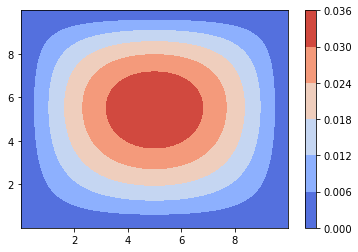

In [9]:
plt.contourf(x1,y1,WW(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

#supor engaste 

In [10]:
dwdx=(smp.diff(W,x))
Teta0=dwdx.subs([(x,0)])
teta0=smp.lambdify([y],Teta0)

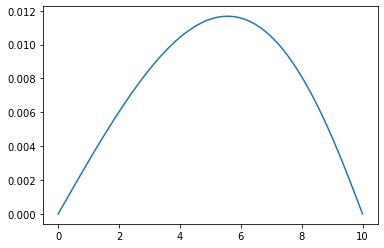

In [11]:
plt.plot(m2,teta0(m2))

In [12]:
#para momento unitario na base engastada

In [13]:
w=(c1*smp.cosh(alfa)+c2*alfa*smp.sinh(alfa)+c3*smp.sinh(alfa)+c4*alfa*smp.cosh(alfa))*smp.sin(smp.pi*n*y/b)
w

(c1*cosh(pi*n*x/10) + pi*c2*n*x*sinh(pi*n*x/10)/10 + c3*sinh(pi*n*x/10) + pi*c4*n*x*cosh(pi*n*x/10)/10)*sin(pi*n*y/10)

In [14]:
w0=w.subs([(x,0)])
w0

c1*sin(pi*n*y/10)

In [15]:
dwdx2=smp.diff((smp.diff(w,x)),x)
dwdy2=smp.diff((smp.diff(w,y)),y)
mx=(dwdx2+v*dwdy2)*d


In [16]:
m0=mx.subs([(x,0)])-smp.sin(smp.pi*y/b)
m0

-117.1875*pi**2*c1*n**2*sin(pi*n*y/10) + 58593.75*(pi**2*c1*n**2/100 + pi**2*c2*n**2/50)*sin(pi*n*y/10) - sin(pi*y/10)

In [17]:
wa=w.subs([(x,a)])
wa

(c1*cosh(pi*n) + pi*c2*n*sinh(pi*n) + c3*sinh(pi*n) + pi*c4*n*cosh(pi*n))*sin(pi*n*y/10)

In [18]:
ma=mx.subs([(x,a)])
ma

-117.1875*pi**2*n**2*(c1*cosh(pi*n) + pi*c2*n*sinh(pi*n) + c3*sinh(pi*n) + pi*c4*n*cosh(pi*n))*sin(pi*n*y/10) + 58593.75*(pi**2*c1*n**2*cosh(pi*n)/100 + pi**3*c2*n**3*sinh(pi*n)/100 + pi**2*c2*n**2*cosh(pi*n)/50 + pi**2*c3*n**2*sinh(pi*n)/100 + pi**3*c4*n**3*cosh(pi*n)/100 + pi**2*c4*n**2*sinh(pi*n)/50)*sin(pi*n*y/10)

In [19]:
sol=smp.solve([wa,ma,m0,w0],[c1,c2,c3,c4])
C1=sol[c1]
C2=sol[c2]
C3=sol[c3]
C4=sol[c4]
wh=smp.summation((C1*smp.cosh(alfa)+C2*alfa*smp.sinh(alfa)+C3*smp.sinh(alfa)+C4*alfa*smp.cosh(alfa))*smp.sin(smp.pi*n*y/b),(n,1,10))
sol

{c1: 0.0,
 c2: 8.64607433747949e-5*sin(0.314159265358979*y)/(n**2*sin(0.314159265358979*n*y)),
 c3: -0.000271624436210168*sin(0.314159265358979*y)/(n*sin(0.314159265358979*n*y)) + 0.000271624436210168*sin(0.314159265358979*y)*cosh(3.14159265358979*n)**2/(n*sin(0.314159265358979*n*y)*sinh(3.14159265358979*n)**2),
 c4: -8.64607433747949e-5*sin(0.314159265358979*y)*cosh(3.14159265358979*n)/(n**2*sin(0.314159265358979*n*y)*sinh(3.14159265358979*n))}

In [20]:
Wh=smp.lambdify([x,y],wh)
wh

(1.08075929218494e-6*pi*x*sin(0.314159265358979*y)*sinh(4*pi*x/5)/sin(2.51327412287183*y) - 1.08075929218494e-6*pi*x*sin(0.314159265358979*y)*cosh(4*pi*x/5)/sin(2.51327412287183*y))*sin(4*pi*y/5) + (9.6067492638661e-7*pi*x*sin(0.314159265358979*y)*sinh(9*pi*x/10)/sin(2.82743338823081*y) - 9.6067492638661e-7*pi*x*sin(0.314159265358979*y)*cosh(9*pi*x/10)/sin(2.82743338823081*y))*sin(9*pi*y/10) + (8.64607433747949e-7*pi*x*sin(0.314159265358979*y)*sinh(pi*x)/sin(3.14159265358979*y) - 8.64607433747949e-7*pi*x*sin(0.314159265358979*y)*cosh(pi*x)/sin(3.14159265358979*y))*sin(pi*y) + (8.64607433747949e-6*pi*x*sinh(pi*x/10) - 8.67842685130495e-6*pi*x*cosh(pi*x/10) + 2.03657157597185e-6*sinh(pi*x/10))*sin(pi*y/10) + (4.32303716873975e-6*pi*x*sin(0.314159265358979*y)*sinh(pi*x/5)/sin(0.628318530717959*y) - 4.32306732066615e-6*pi*x*sin(0.314159265358979*y)*cosh(pi*x/5)/sin(0.628318530717959*y) + 1.89450801636628e-9*sin(0.314159265358979*y)*sinh(pi*x/5)/sin(0.628318530717959*y))*sin(pi*y/5) + (2.88

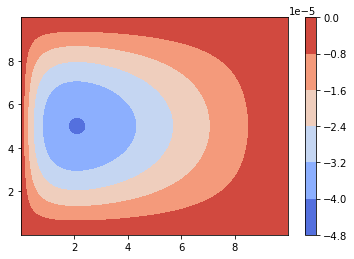

In [21]:
plt.contourf(x1,y1,Wh(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

In [22]:
Teta0h=smp.diff(wh,x)
T0=Teta0h.subs([(x,0)])
Th=smp.lambdify([y],T0)


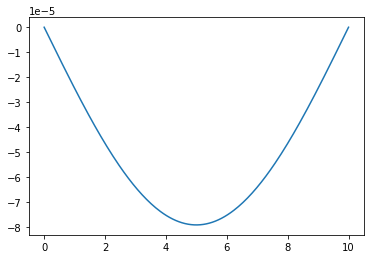

In [23]:
plt.plot(m2,Th(m2))

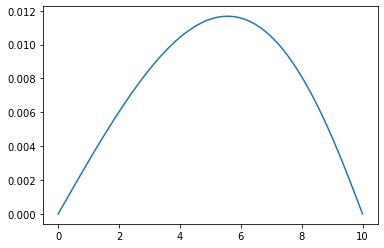

In [24]:
plt.plot(m2,teta0(m2))

In [25]:
X=Teta0/T0
M2=X*smp.sin(smp.pi*y/b)
MM2=smp.lambdify([y],M2)

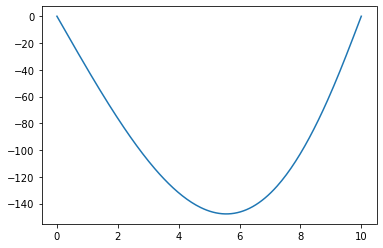

In [26]:
plt.plot(m2,MM2(m2))

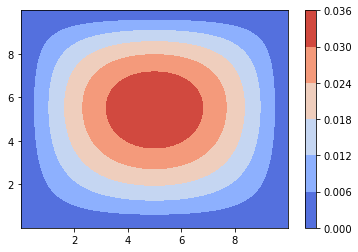

In [27]:
plt.contourf(x1,y1,WW(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

In [28]:
wf=wh*X-W
tm=smp.diff(wf,x)
tf=smp.diff(wh*X,x)
t0=smp.diff(W,x)
tf=smp.lambdify([x,y],tf)
Wf=smp.lambdify([x,y],wf)
T0=smp.lambdify([x,y],t0)

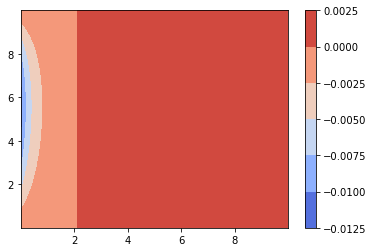

In [29]:
plt.contourf(x1,y1,-tf(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

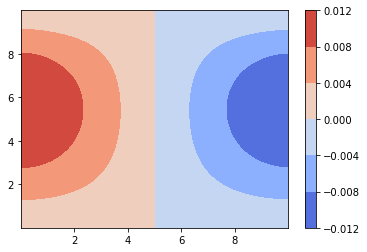

In [30]:
plt.contourf(x1,y1,T0(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

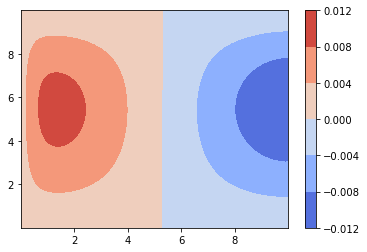

In [31]:
plt.contourf(x1,y1,-tf(x1,y1)+T0(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

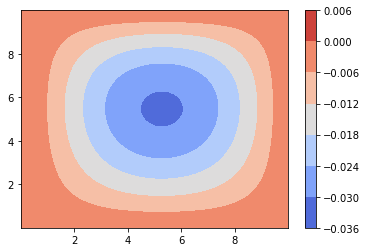

In [32]:
plt.contourf(x1,y1,Wf(x1,y1),levels=5,cmap='coolwarm')
plt.colorbar()

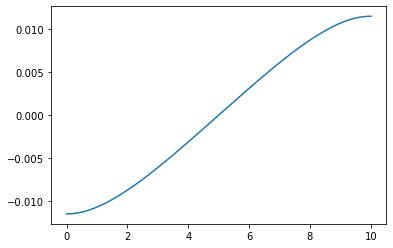

In [33]:
an=t0.subs([(x,5)])
An=smp.lambdify([x],an)
plt.plot(m2,-An(m2))

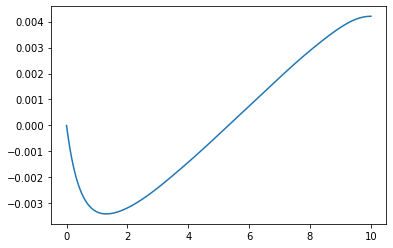

In [45]:
ad=smp.diff(wf,x)
AD=ad.subs([(y,9)])

Ad=smp.lambdify([x],AD)
plt.plot(m1,Ad(m1))

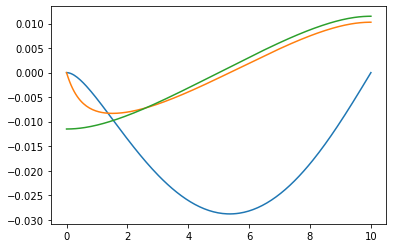

In [35]:
ru=wf.subs([(y,5)])
As=smp.lambdify([x],ru)
plt.plot(m2,As(m2))
plt.plot(m2,Ad(m2))
plt.plot(m2,-An(m2))

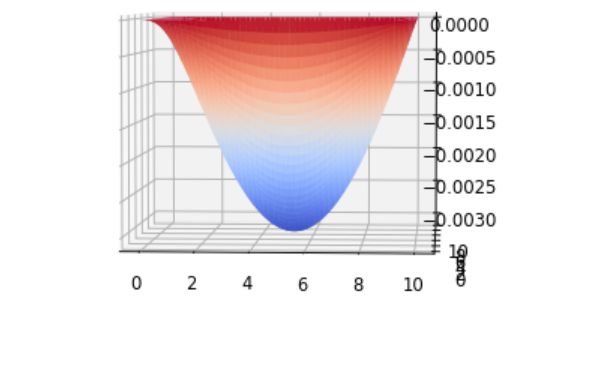